In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

data= pd.read_csv('D:/EXCEL/excel/covid_19_clean_complete.csv')
data.head(20)

Province/State       Country/Region        Lat        Long  \
0                            NaN          Afghanistan  33.939110   67.709953   
1                            NaN              Albania  41.153300   20.168300   
2                            NaN              Algeria  28.033900    1.659600   
3                            NaN              Andorra  42.506300    1.521800   
4                            NaN               Angola -11.202700   17.873900   
5                            NaN  Antigua and Barbuda  17.060800  -61.796400   
6                            NaN            Argentina -38.416100  -63.616700   
7                            NaN              Armenia  40.069100   45.038200   
8   Australian Capital Territory            Australia -35.473500  149.012400   
9                New South Wales            Australia -33.868800  151.209300   
10            Northern Territory            Australia -12.463400  130.845600   
11                    Queensland            Australia -27.469800  153.025100   
12               South Australia            Australia -34.928500  138.600700   
13                      Tasmania            Australia -42.882100  147.327200   
14                      Victoria            Australia -37.813600  144.963100   
15             Western Australia            Australia -31.950500  115.860500   
16                           NaN              Austria  47.516200   14.550100   
17                           NaN           Azerbaijan  40.143100   47.576900   
18                           NaN              Bahamas  25.025885  -78.035889   
19                           NaN              Bahrain  26.027500   50.550000   

          Date  Confirmed  Deaths  Recovered  Active             WHO Region  
0   2020-01-22          0       0          0       0  Eastern Mediterranean  
1   2020-01-22          0       0          0       0                 Europe  
2   2020-01-22          0       0          0       0                 Africa  
3   2020-01-22          0       0          0       0                 Europe  
4   2020-01-22          0       0          0       0                 Africa  
5   2020-01-22          0       0          0       0               Americas  
6   2020-01-22          0       0          0       0               Americas  
7   2020-01-22          0       0          0       0                 Europe  
8   2020-01-22          0       0          0       0        Western Pacific  
9   2020-01-22          0       0          0       0        Western Pacific  
10  2020-01-22          0       0          0       0        Western Pacific  
11  2020-01-22          0       0          0       0        Western Pacific  
12  2020-01-22          0       0          0       0        Western Pacific  
13  2020-01-22          0       0          0       0        Western Pacific  
14  2020-01-22          0       0          0       0        Western Pacific  
15  2020-01-22          0       0          0       0        Western Pacific  
16  2020-01-22          0       0          0       0                 Europe  
17  2020-01-22          0       0          0       0                 Europe  
18  2020-01-22          0       0          0       0               Americas  
19  2020-01-22          0       0          0       0  Eastern Mediterranean

In [2]:
data.drop(['WHO Region','Long','Lat'],axis=1,inplace =True)


In [17]:
data.rename(columns={'Province/State':'Province','Country/Region':'Country'},inplace=True)
data['Date']= pd.to_datetime(data['Date'])
data.head(3)

Province      Country       Lat       Long       Date  Confirmed  Deaths  \
0      NaN  Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1      NaN      Albania  41.15330  20.168300 2020-01-22          0       0   
2      NaN      Algeria  28.03390   1.659600 2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa

In [16]:
imputer= SimpleImputer(strategy='constant')
data2 = pd.DataFrame(imputer.fit_transform(data),columns=data.columns)

In [18]:
data3 =data.groupby(['Country','Date'])[['Country','Date','Active','Deaths','Recovered','Confirmed']].sum().reset_index()                     
data3


Country       Date  Active  Deaths  Recovered  Confirmed
0      Afghanistan 2020-01-22       0       0          0          0
1      Afghanistan 2020-01-23       0       0          0          0
2      Afghanistan 2020-01-24       0       0          0          0
3      Afghanistan 2020-01-25       0       0          0          0
4      Afghanistan 2020-01-26       0       0          0          0
...            ...        ...     ...     ...        ...        ...
35151     Zimbabwe 2020-07-23    1586      28        510       2124
35152     Zimbabwe 2020-07-24    1750      32        514       2296
35153     Zimbabwe 2020-07-25    1882      34        518       2434
35154     Zimbabwe 2020-07-26    1960      34        518       2512
35155     Zimbabwe 2020-07-27    2126      36        542       2704

[35156 rows x 6 columns]

In [19]:
countries = data3['Country'].unique()
len(countries)

187

C:\Users\211BN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


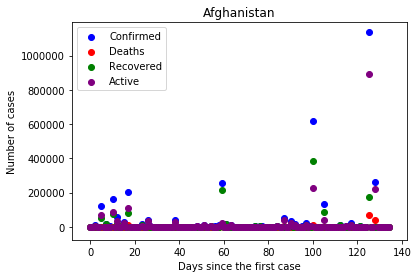

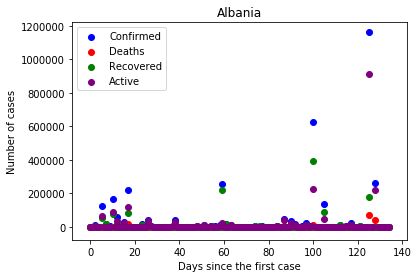

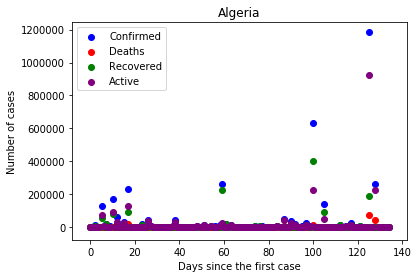

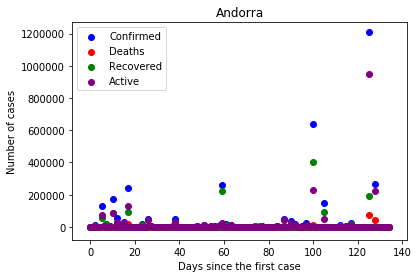

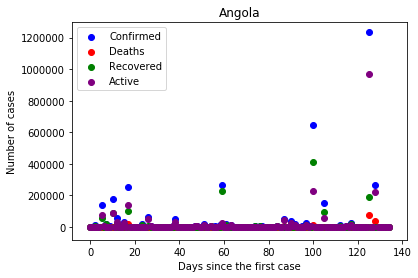

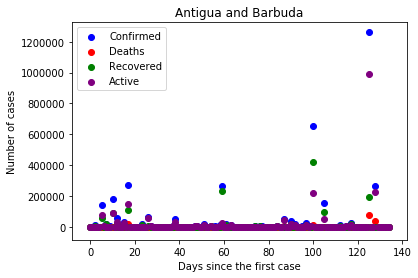

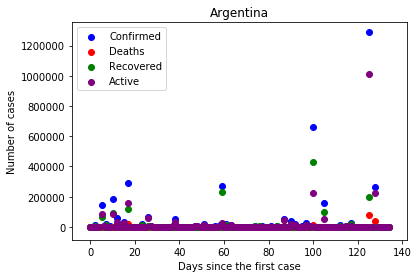

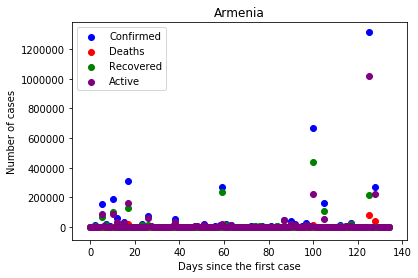

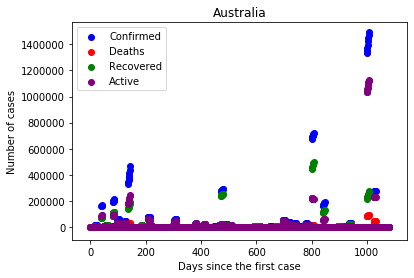

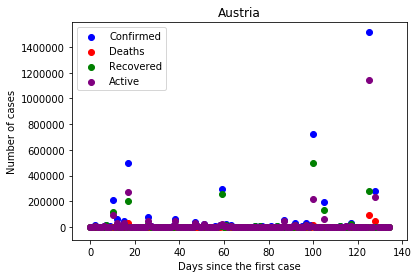

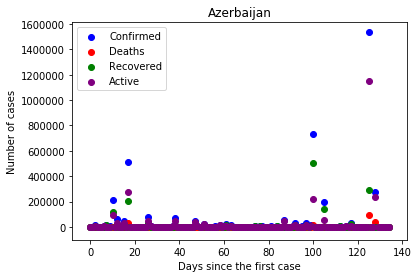

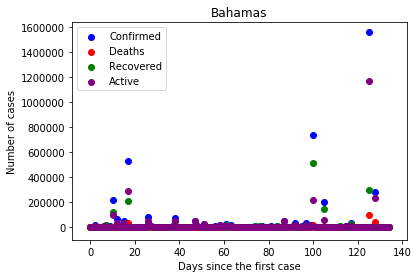

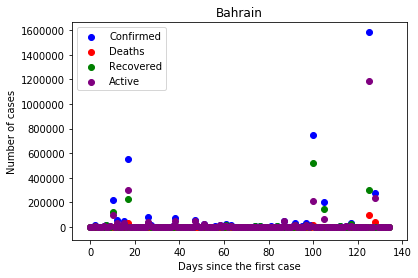

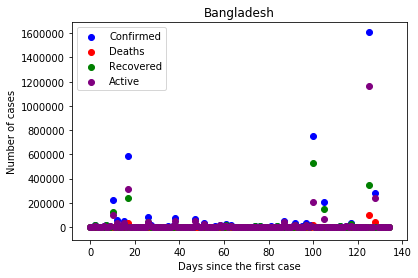

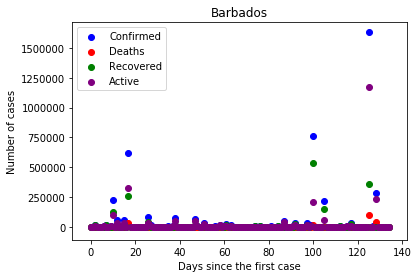

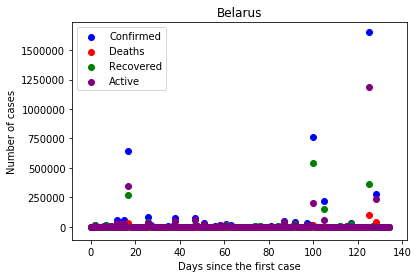

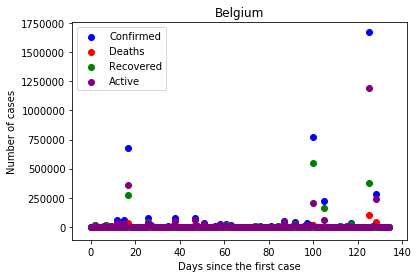

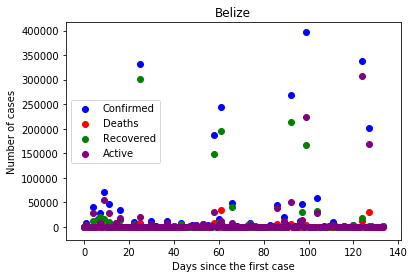

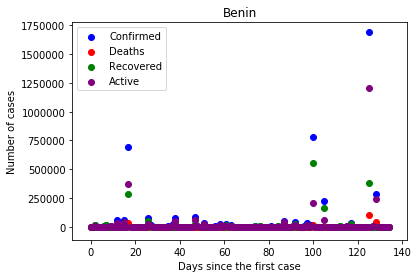

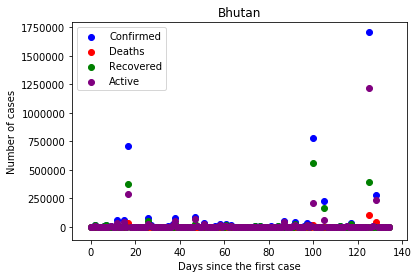

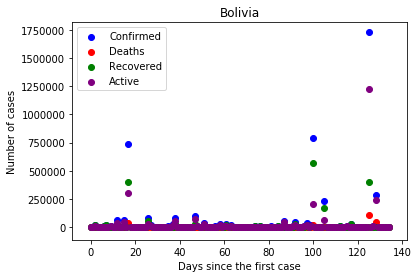

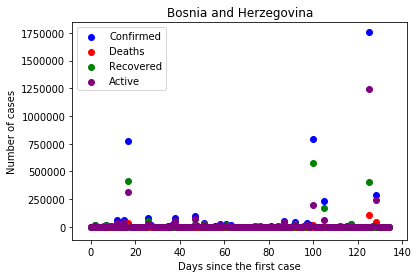

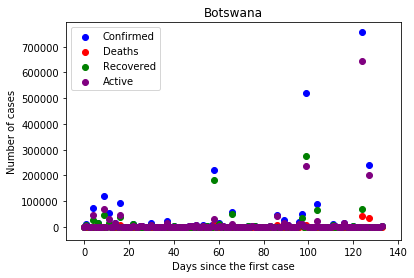

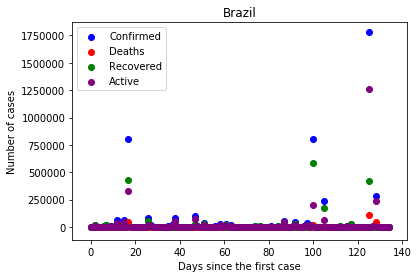

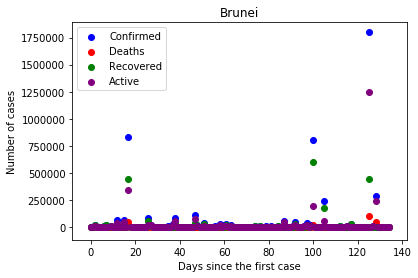

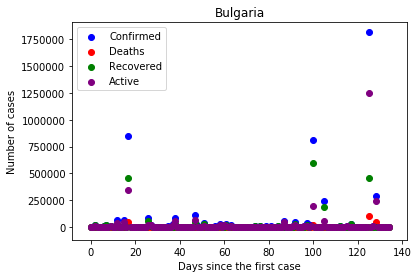

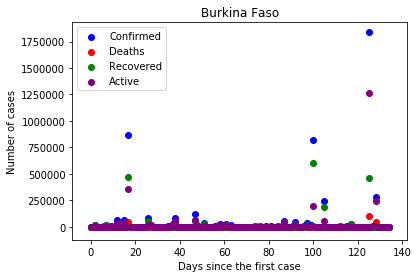

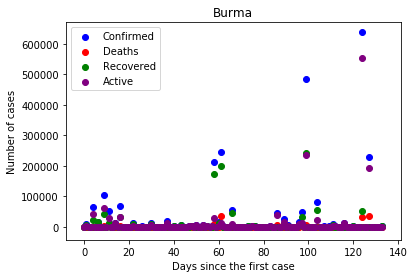

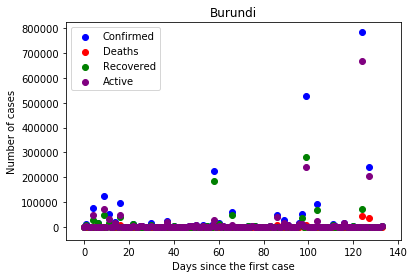

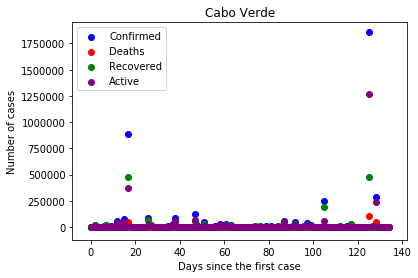

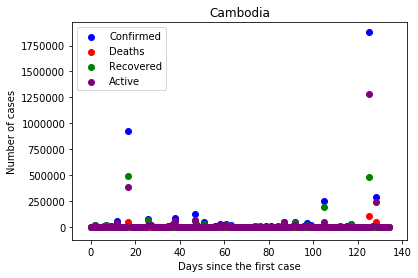

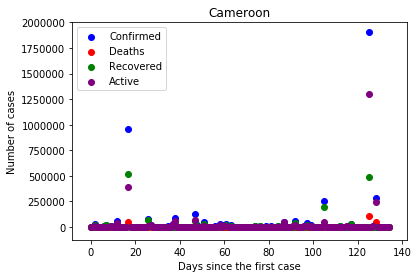

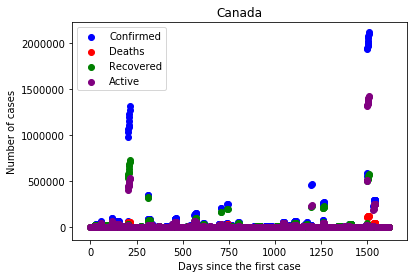

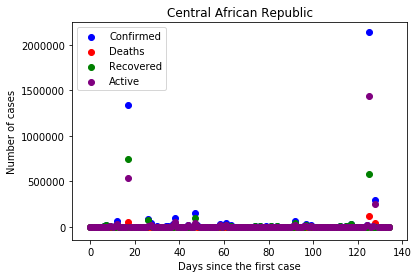

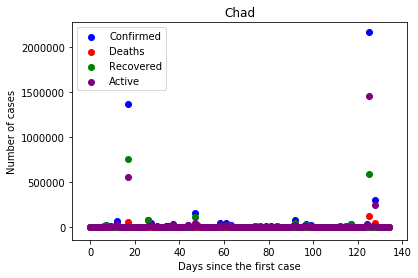

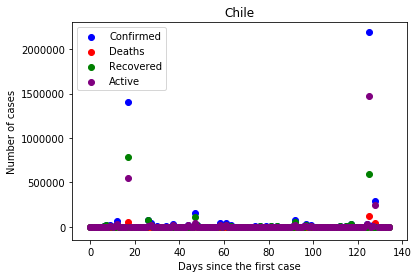

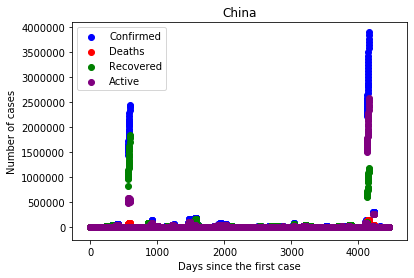

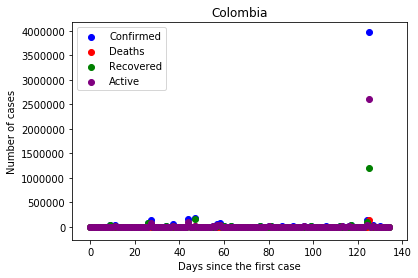

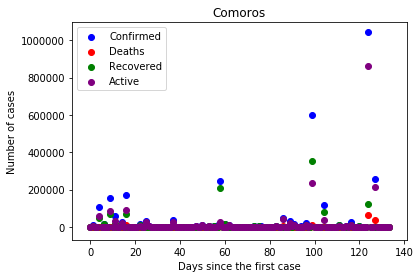

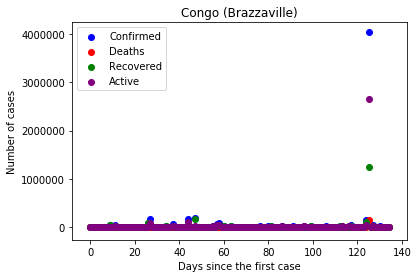

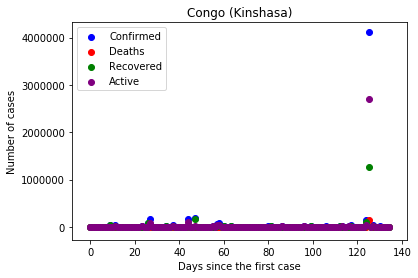

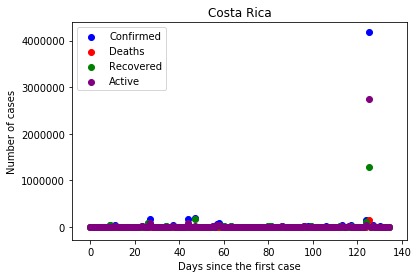

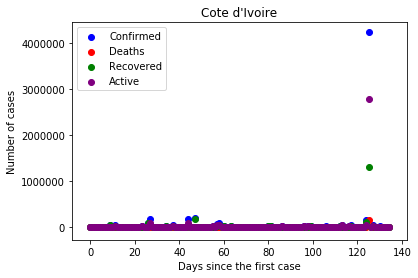

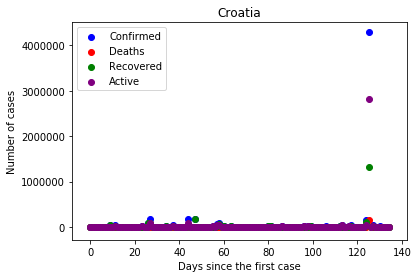

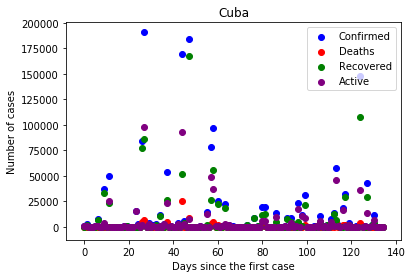

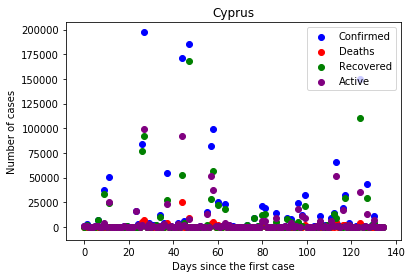

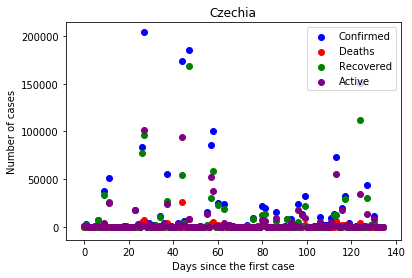

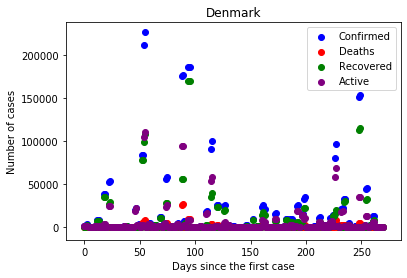

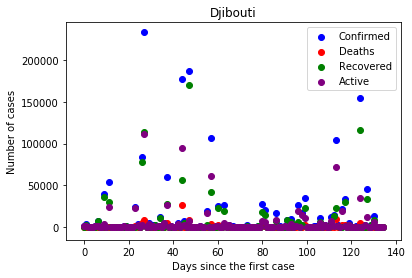

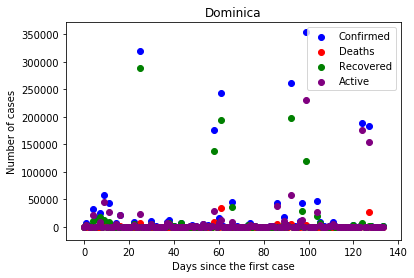

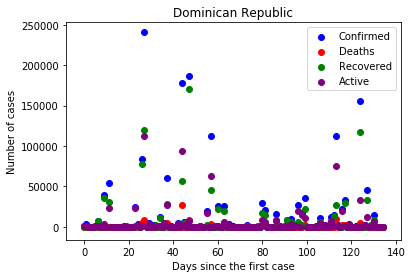

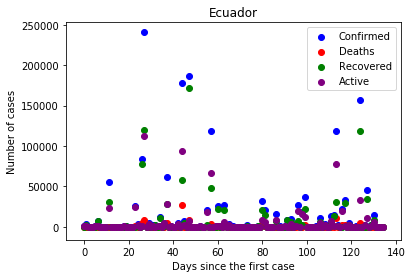

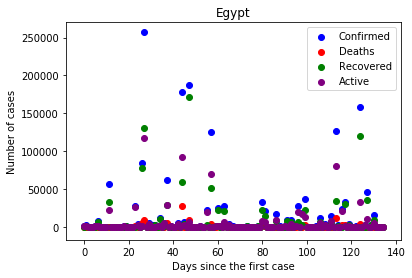

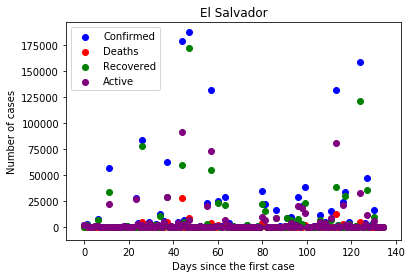

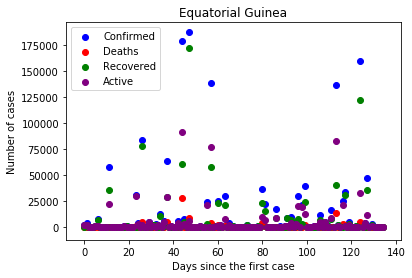

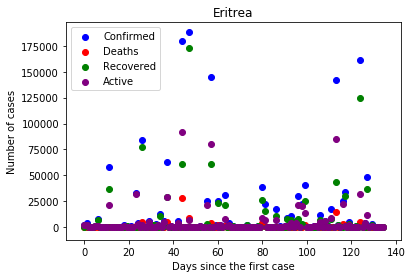

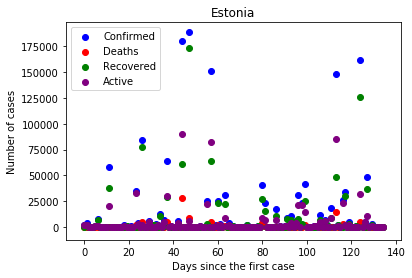

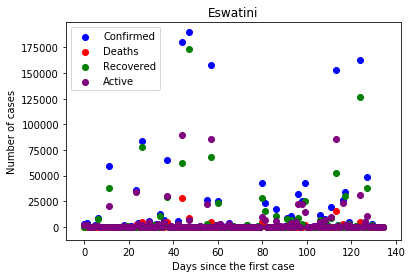

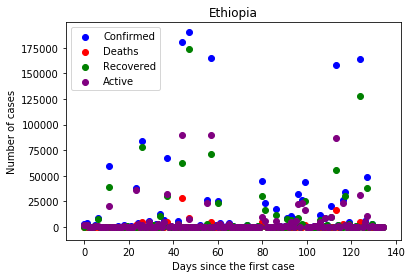

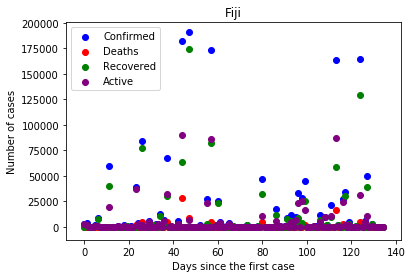

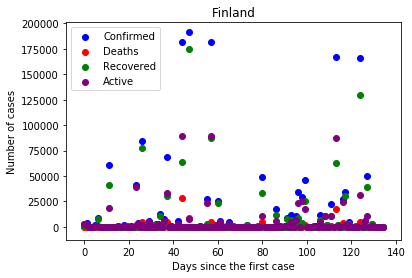

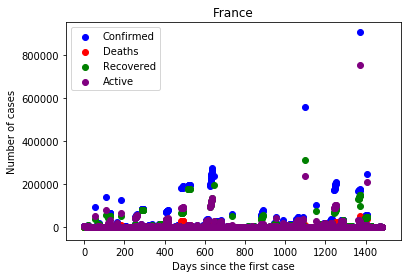

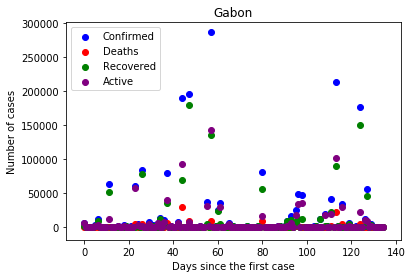

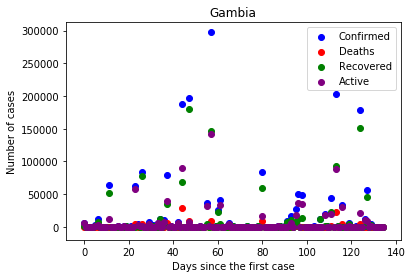

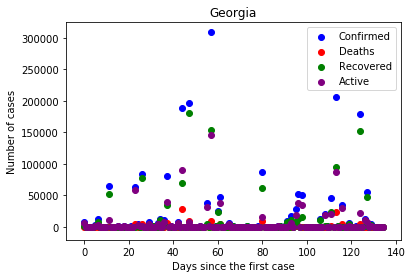

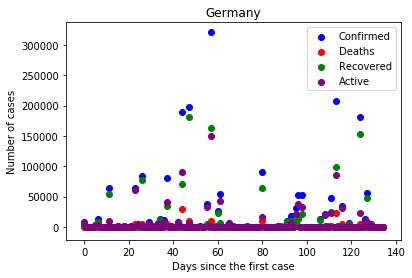

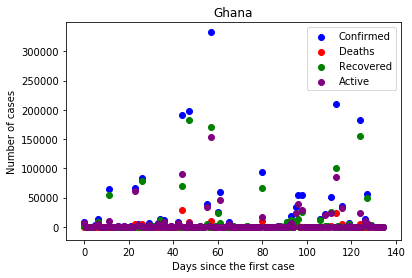

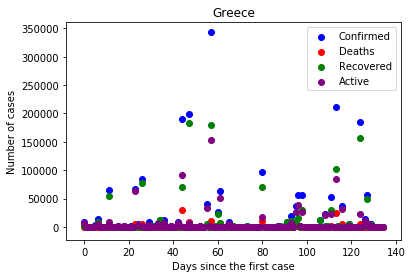

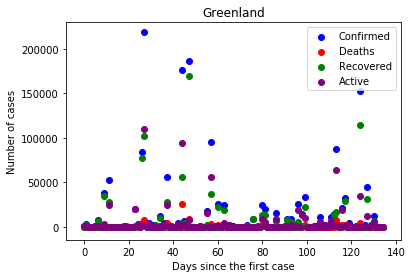

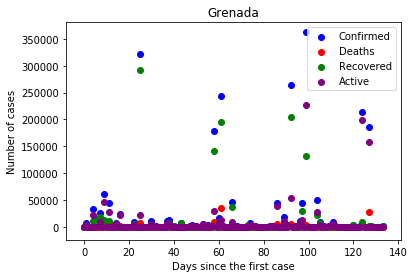

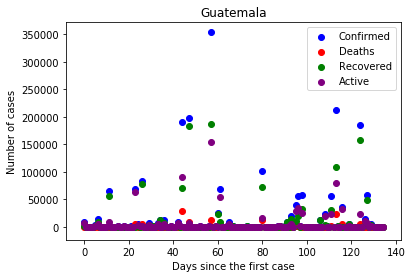

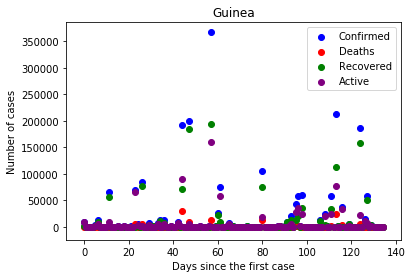

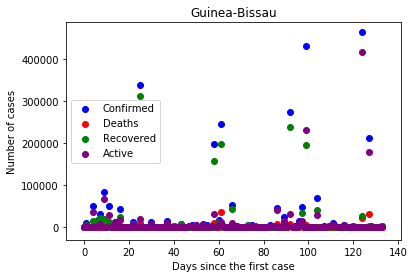

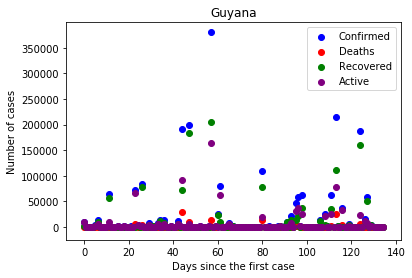

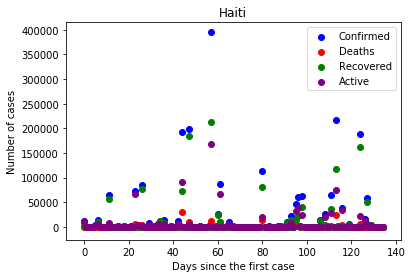

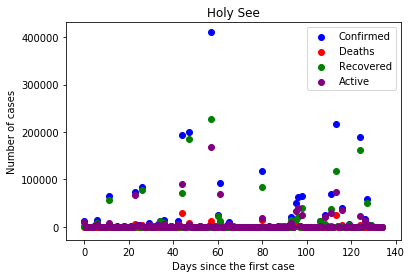

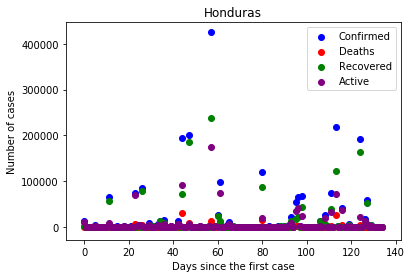

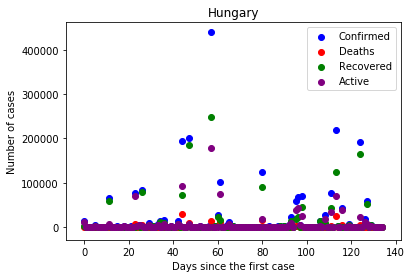

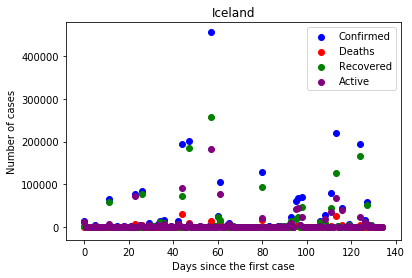

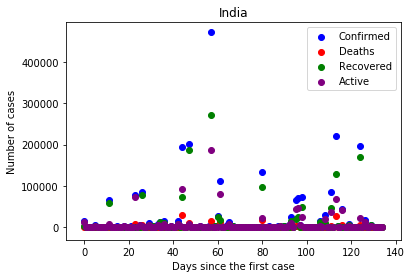

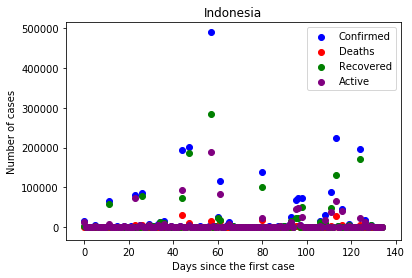

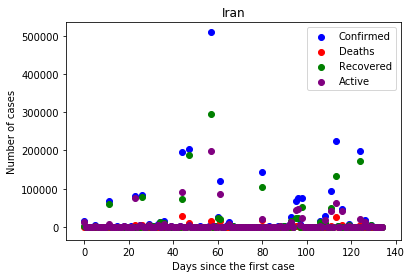

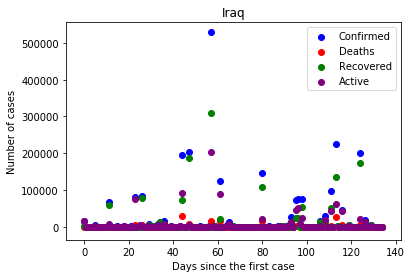

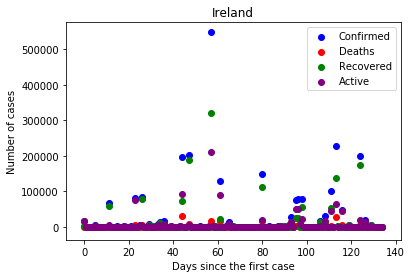

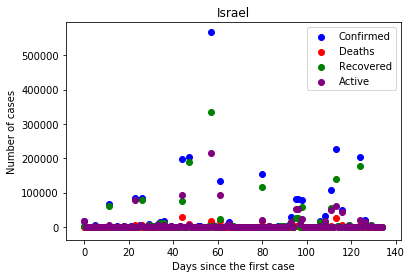

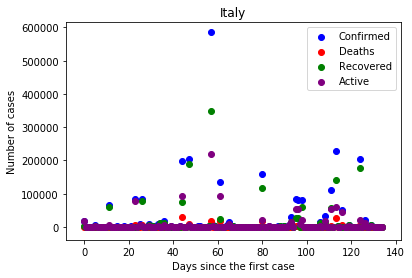

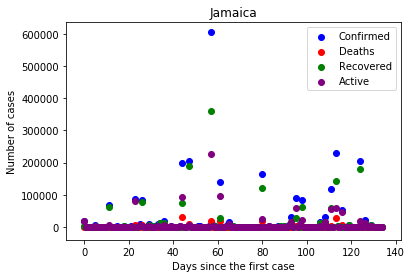

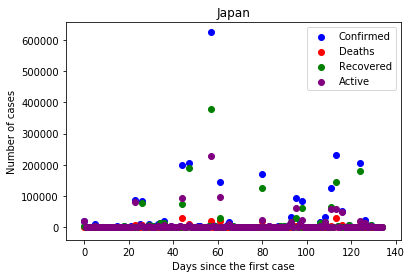

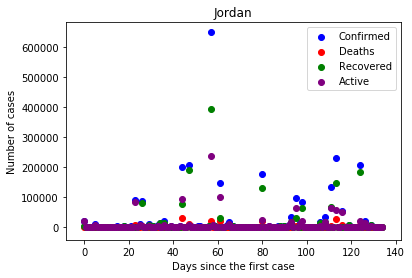

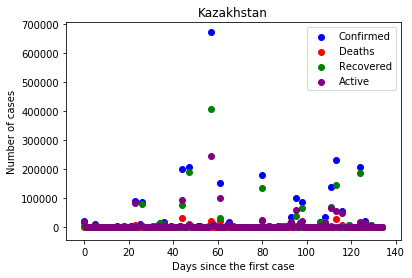

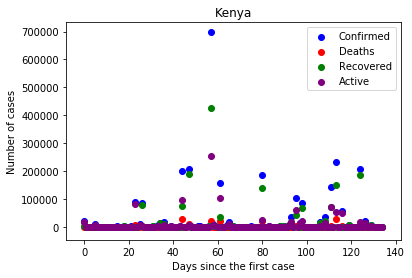

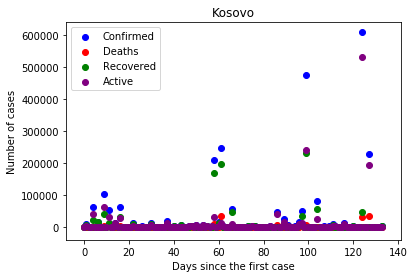

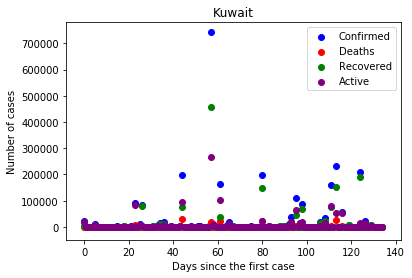

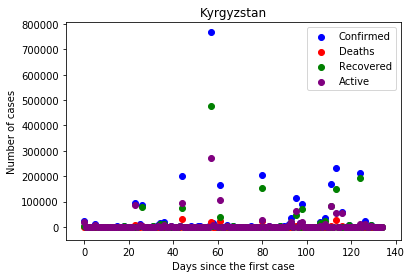

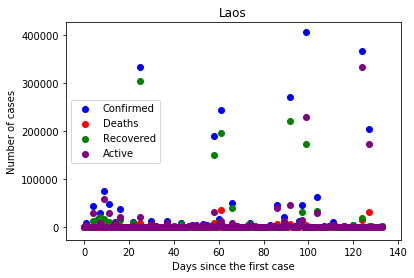

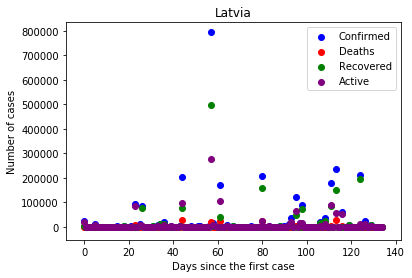

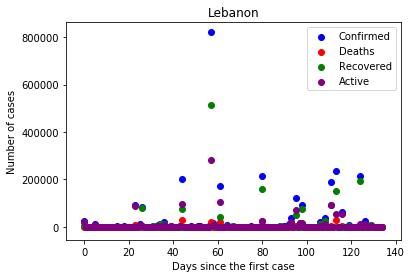

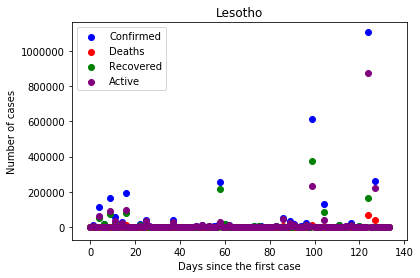

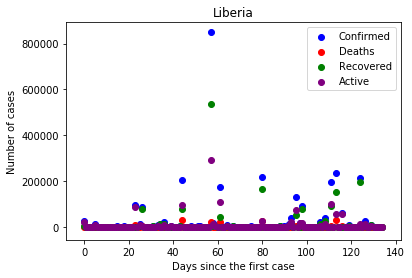

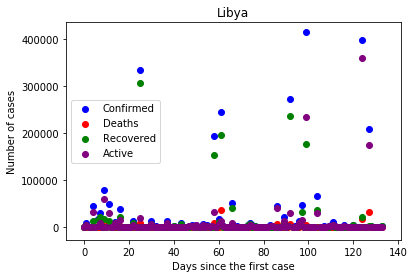

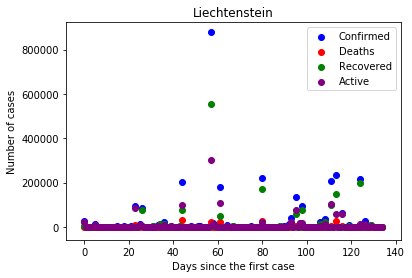

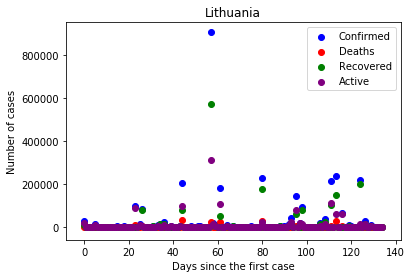

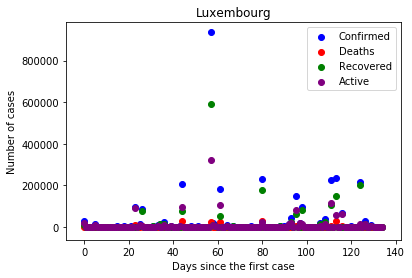

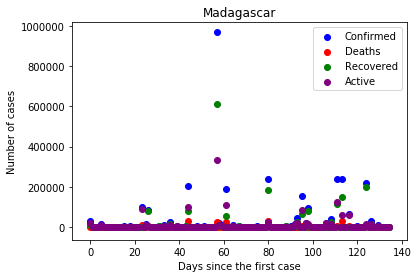

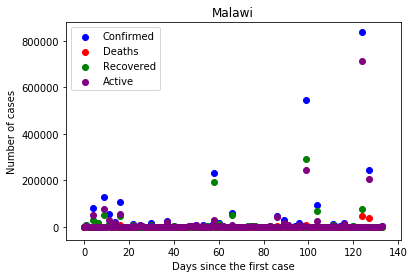

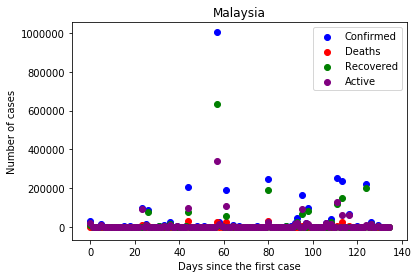

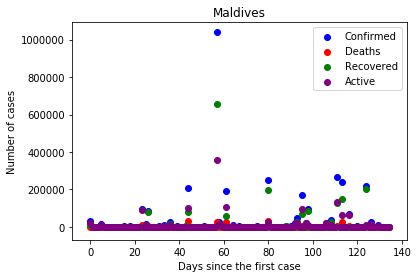

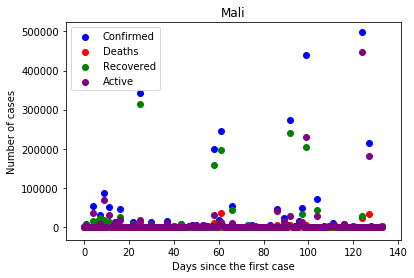

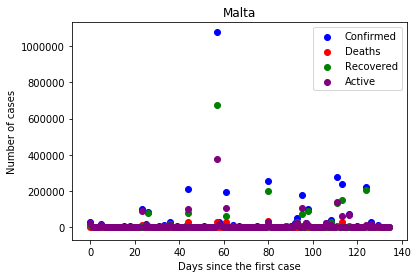

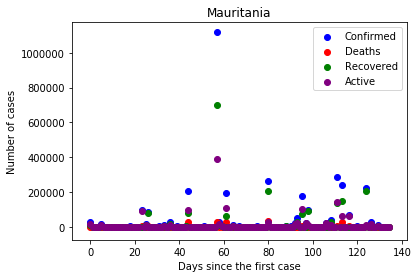

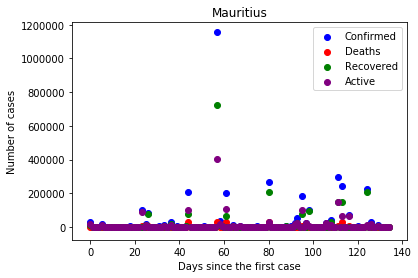

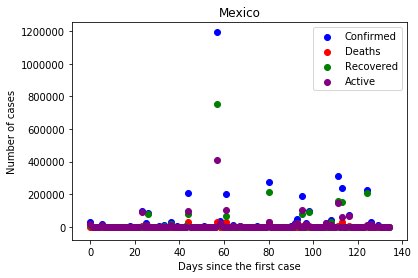

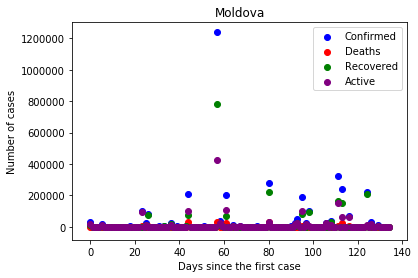

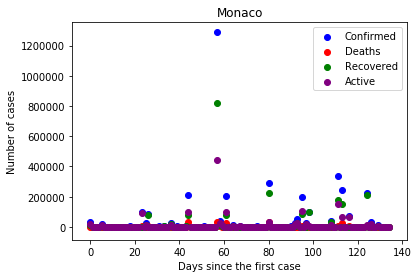

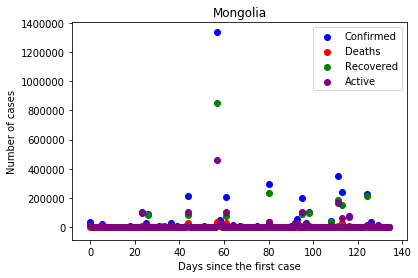

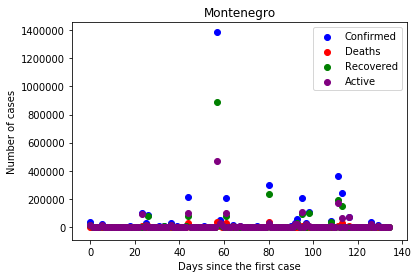

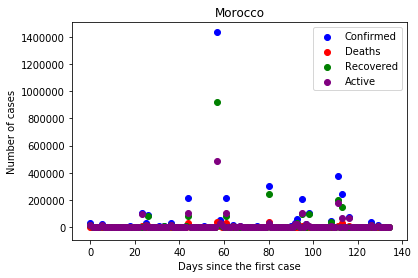

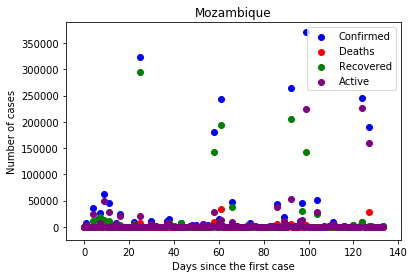

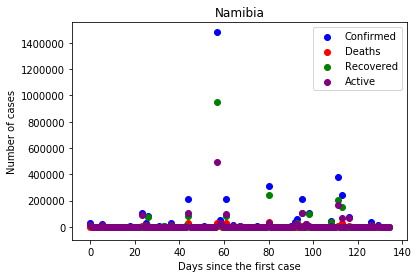

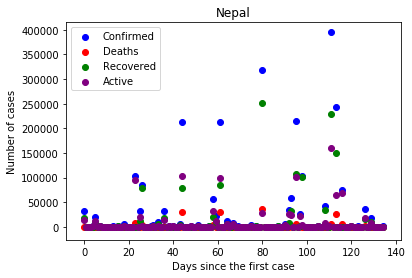

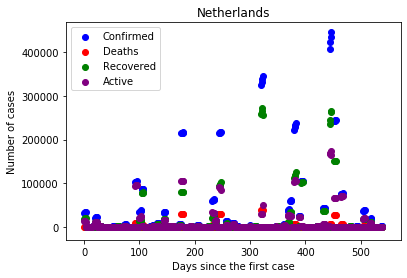

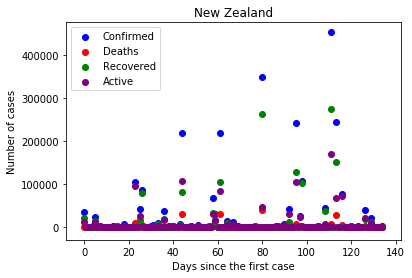

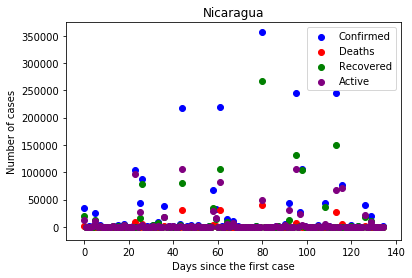

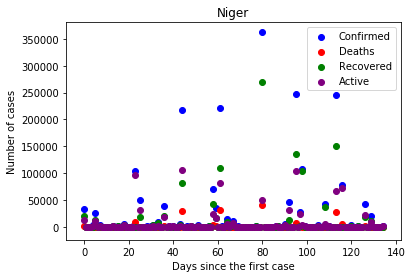

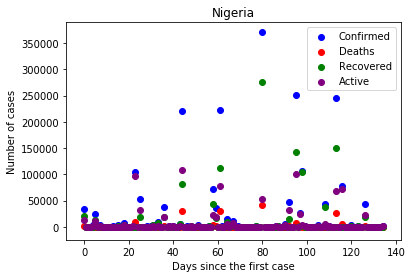

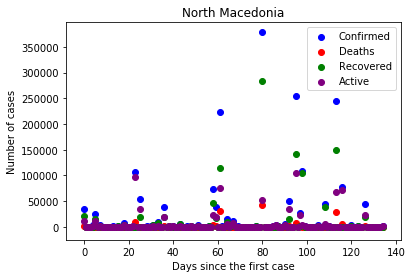

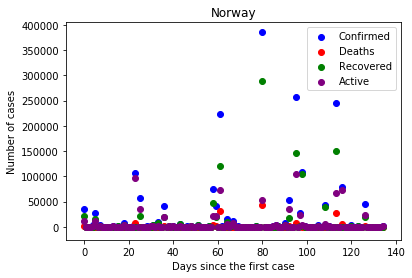

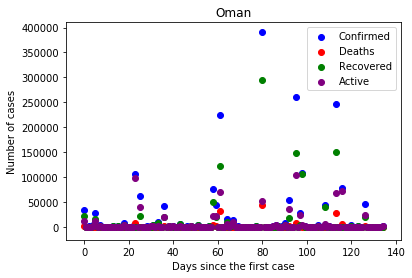

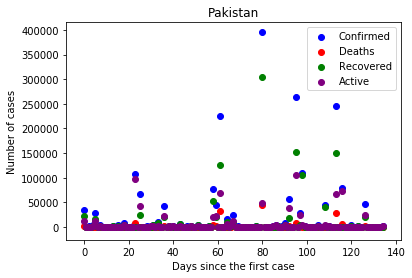

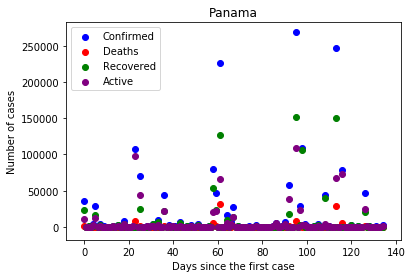

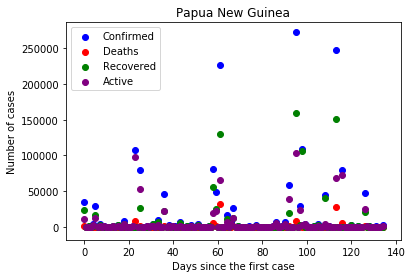

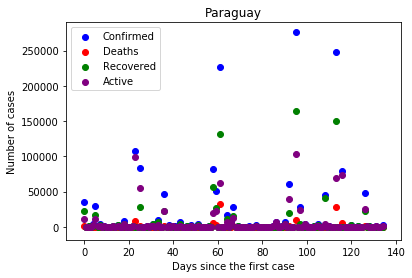

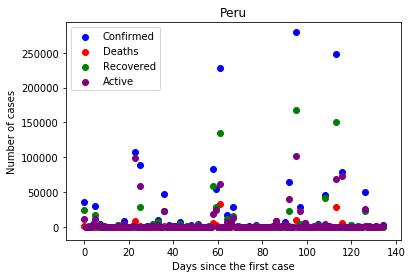

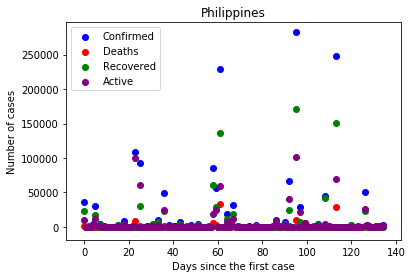

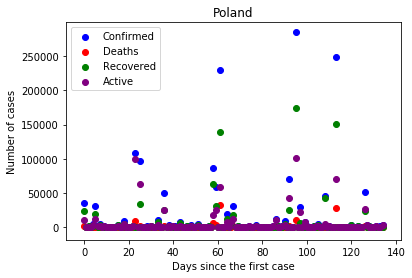

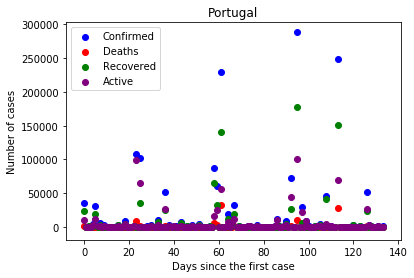

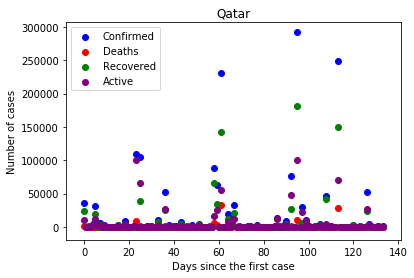

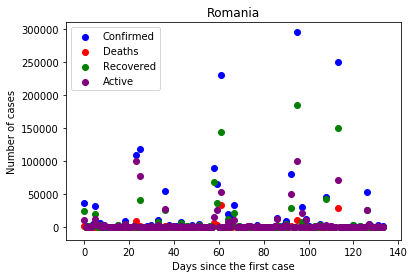

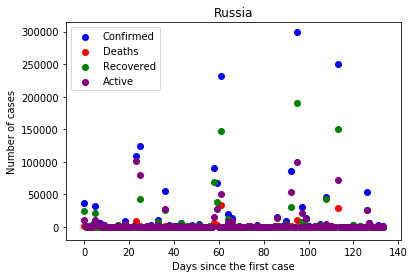

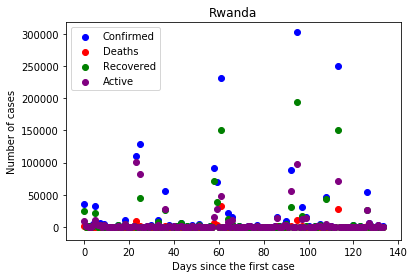

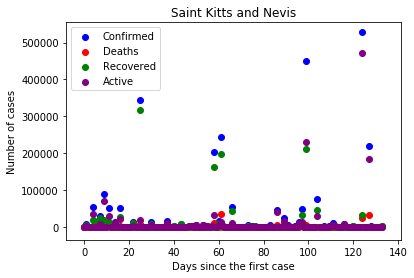

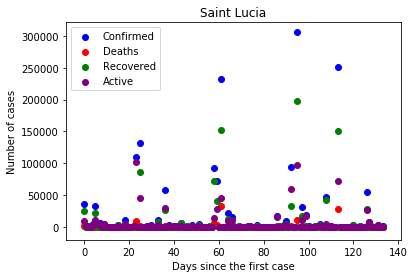

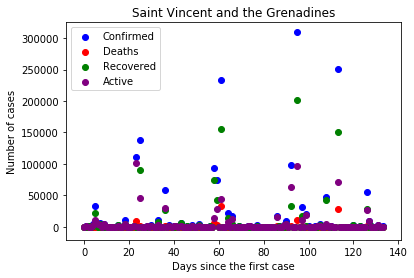

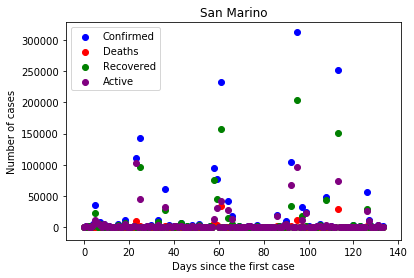

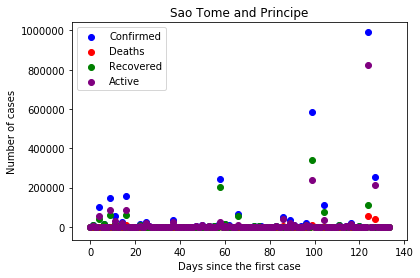

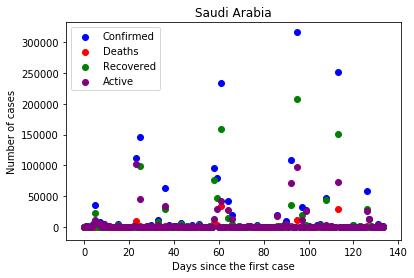

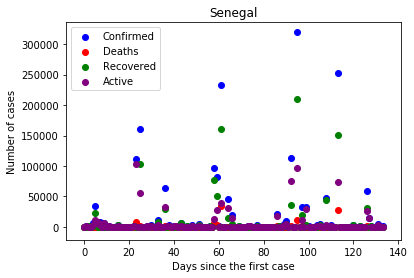

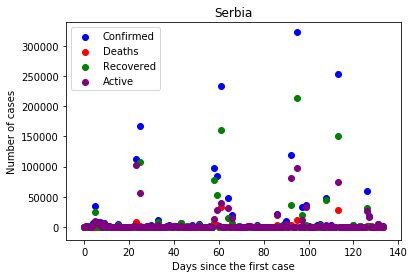

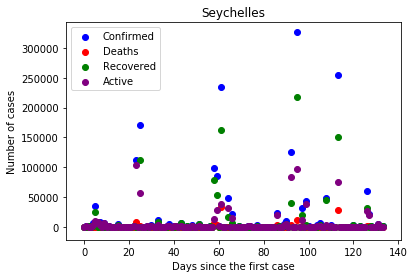

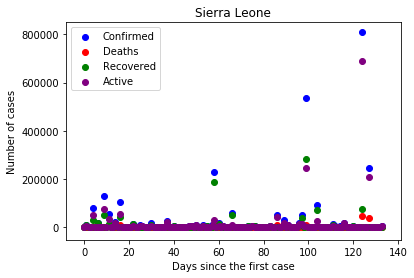

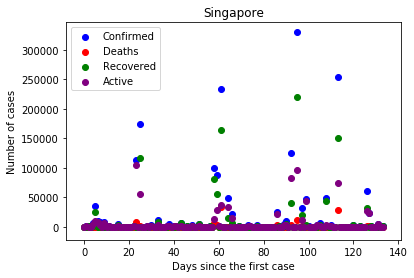

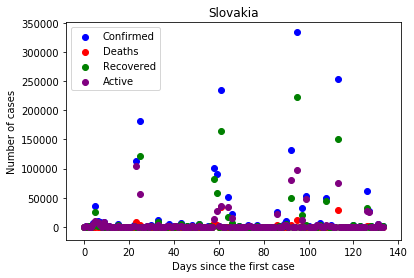

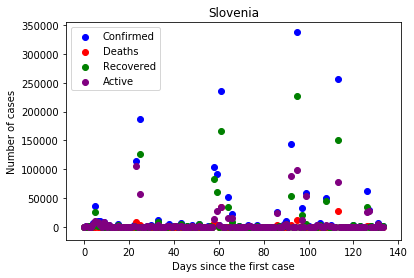

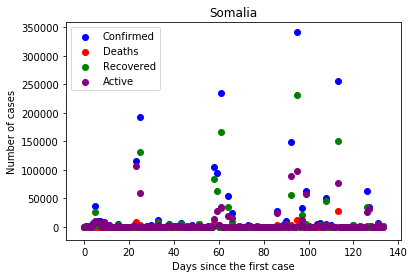

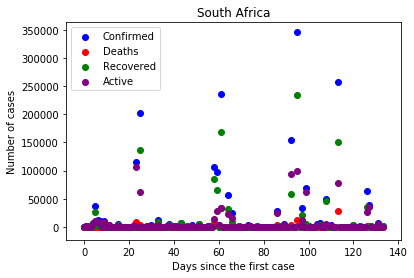

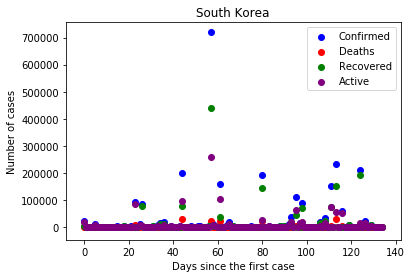

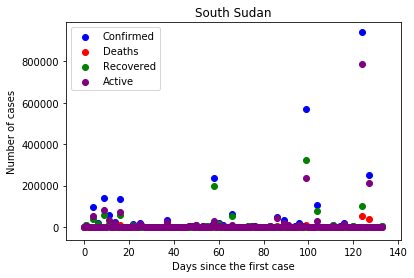

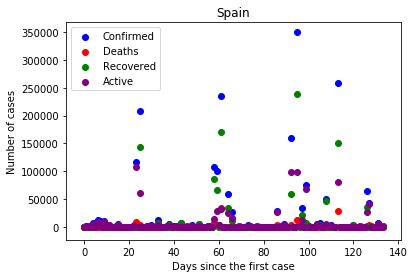

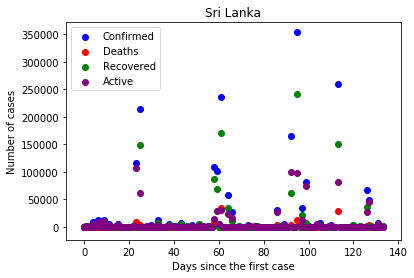

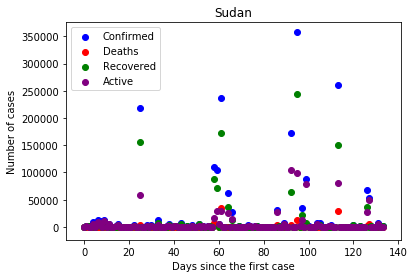

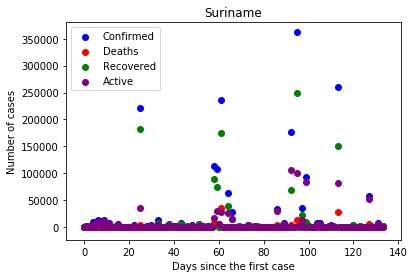

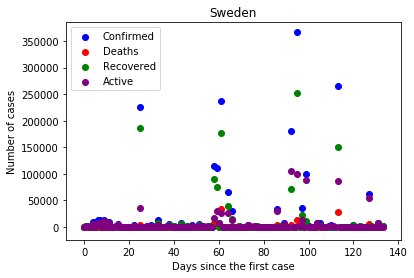

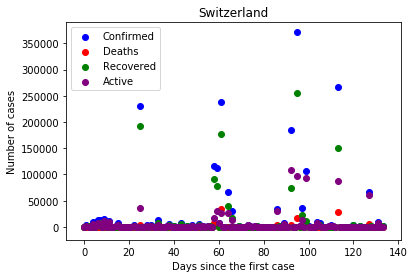

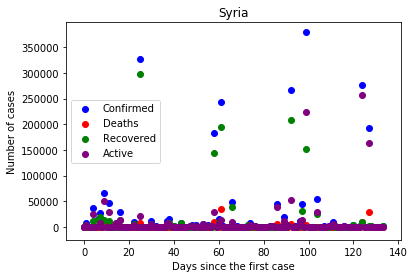

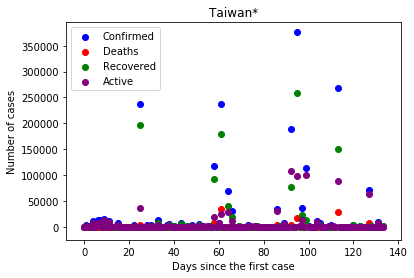

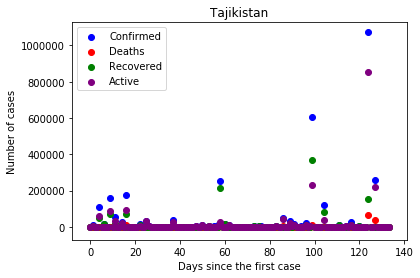

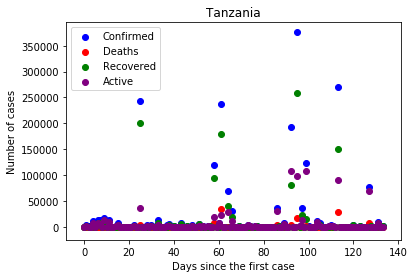

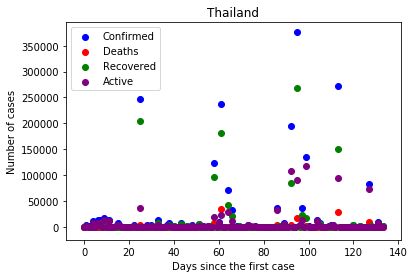

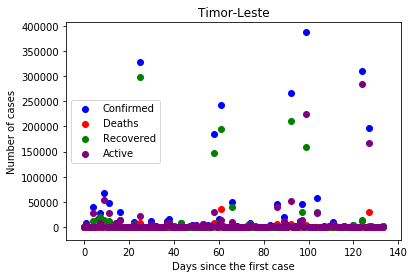

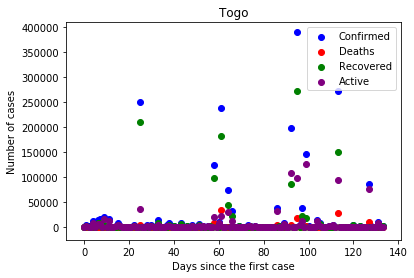

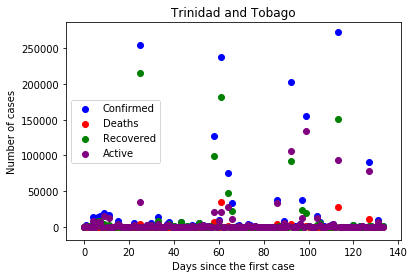

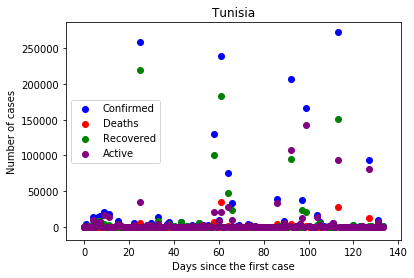

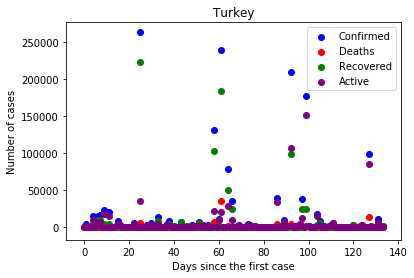

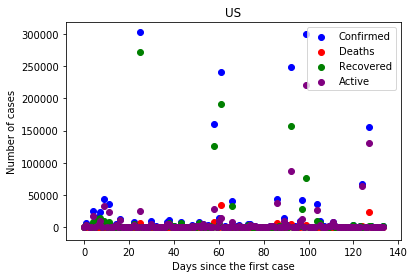

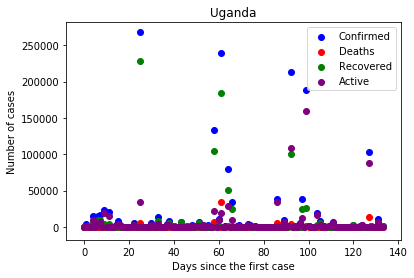

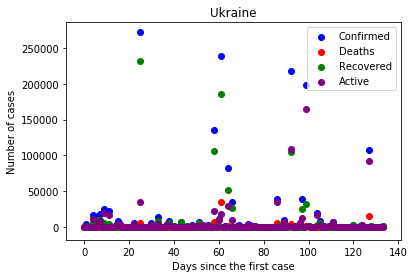

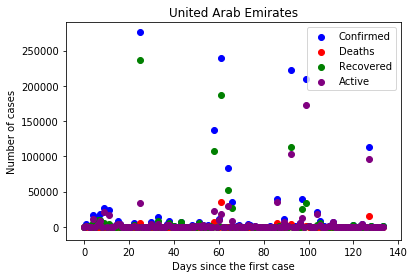

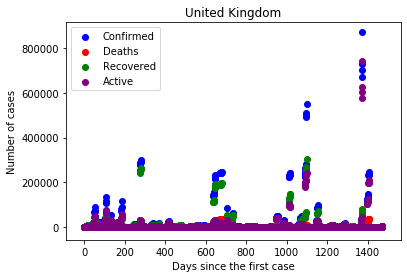

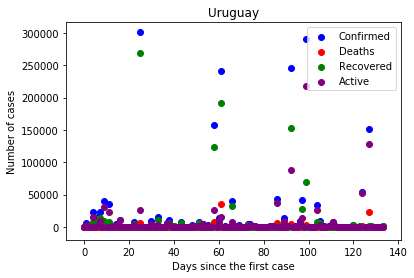

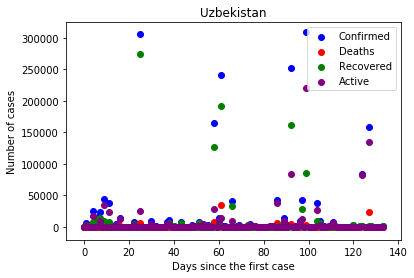

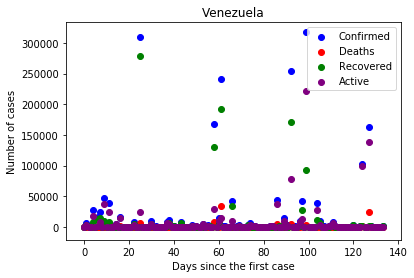

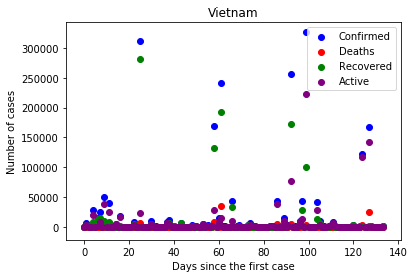

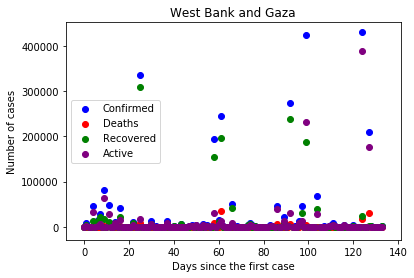

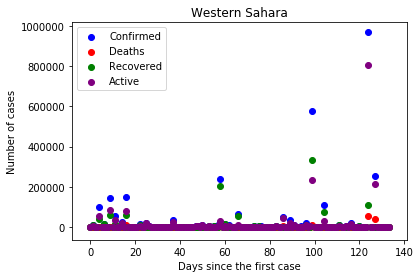

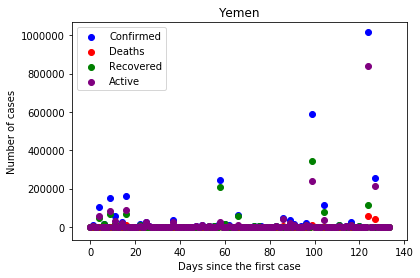

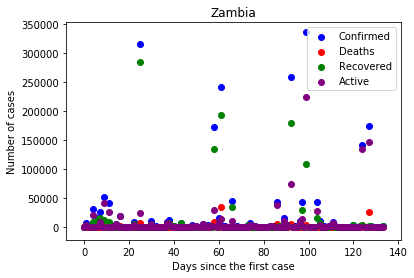

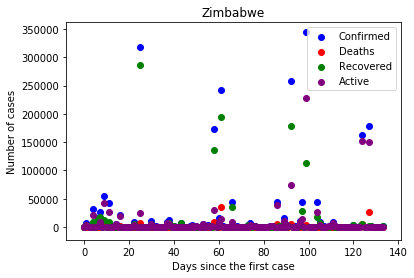

In [9]:
for idx in range(0,len(countries)):
    c =data3[data['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(c)),c['Confirmed'],color='blue',label ='Confirmed')
    plt.scatter(np.arange(0,len(c)),c['Deaths'],color='red',label ='Deaths')
    plt.scatter(np.arange(0,len(c)),c['Recovered'],color='green',label ='Recovered')
    plt.scatter(np.arange(0,len(c)),c['Active'],color='purple',label ='Active')
    plt.title(countries[idx])
    plt.xlabel('Days since the first case')
    plt.ylabel("Number of cases")
    plt.legend()
    plt.show()

    
    

In [25]:
data4 = data3.groupby(['Date'])[['Date','Confirmed','Deaths','Active','Recovered']].sum().reset_index()

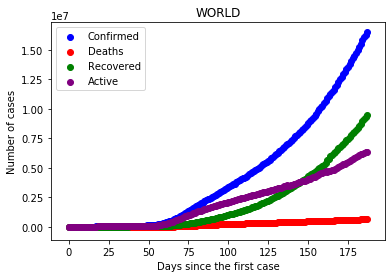

In [26]:
C = data4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label ='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label ='Deaths')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label ='Recovered')
plt.scatter(np.arange(0,len(C)),C['Active'],color='purple',label ='Active')
plt.title('WORLD')
plt.xlabel('Days since the first case')
plt.ylabel('Number of cases')
plt.legend()
plt.show()


In [30]:
data4.head(100)

Date  Confirmed  Deaths   Active  Recovered
0  2020-01-22        555      17      510         28
1  2020-01-23        654      18      606         30
2  2020-01-24        941      26      879         36
3  2020-01-25       1434      42     1353         39
4  2020-01-26       2118      56     2010         52
..        ...        ...     ...      ...        ...
95 2020-04-26    2964146  210862  1927315     825969
96 2020-04-27    3032850  215511  1964957     852382
97 2020-04-28    3108149  221974  2001495     884680
98 2020-04-29    3185195  228742  2030701     925752
99 2020-04-30    3268876  234704  2044556     989616

[100 rows x 5 columns]